In [3]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.options.display.max_colwidth = 150
import numpy as np
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split

In [4]:
df_ppl = pd.read_csv('data/People.csv')
df_cars = pd.read_csv('data/Vehicles.csv')
df_crashes = pd.read_csv('data/Crashes.csv')

C:\Users\sethk\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (12,13,20,21,22,23,24,25,26,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\sethk\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (19,21,40,41,42,44,48,49,50,53,55,58,59,61,71) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\sethk\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df_crashes.columns = df_crashes.columns.str.strip().str.lower()
df_cars.columns = df_cars.columns.str.strip().str.lower()
df_ppl.columns = df_ppl.columns.str.strip().str.lower()

In [6]:
severe_injuries = df_crashes[(df_crashes['injuries_incapacitating'] >= 1) | (df_crashes['injuries_fatal'] >= 1)]
severe_injuries

,crash_record_id,rd_no,crash_date_est_i,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,lane_cnt,alignment,roadway_surface_cond,road_defect,report_type,crash_type,intersection_related_i,not_right_of_way_i,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,photos_taken_i,statements_taken_i,dooring_i,work_zone_i,work_zone_type,workers_present_i,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location
31,09eba71804d41a145cbf5423f5a6a99fe8e8e08d4f475793b1a008aa4f7c62126e1ff704918e4d6c69d05647c02c4a509e981ae6a448297957c7ce591237b163,JD292201,NaN,07/10/2020 02:55:00 AM,30,TRAFFIC SIGNAL,UNKNOWN,UNKNOWN,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,FOUR WAY,NaN,STRAIGHT AND LEVEL,WET,UNKNOWN,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,NaN,Y,"OVER $1,500",07/10/2020 02:55:00 AM,UNABLE TO DETERMINE,NOT APPLICABLE,501,S,SACRAMENTO BLVD,1135.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,FATAL,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2,6,7,NaN,NaN,NaN
93,1d6129948f25958aaa828c48f46ede1d07d9a14a29431fb552bf464bbfccbe5a6f1b9da6f4ee75d6de1b9f6d0aefc8be2e425fa1eb7435a30c2145c94f231686,JC448649,NaN,09/25/2019 11:10:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",09/25/2019 11:12:00 PM,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER",PHYSICAL CONDITION OF DRIVER,448,E,OHIO ST,1834.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,INCAPACITATING INJURY,1.0,0.0,1.0,0.0,0.0,2.0,0.0,23,4,9,41.892782,-87.615890,POINT (-87.615889927957 41.892781623007)
95,1ec7df5197ad2c75687061922a58daaedf81612ff92be2a595fc1aabda88b5fa112eec18751018249c440ccd9f2e93d90f961838b44c8db0cabffd6ad2327940,JB451305,NaN,09/26/2018 08:27:00 AM,0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PEDESTRIAN,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,$500 OR LESS,09/26/2018 08:30:00 AM,FAILING TO REDUCE SPEED TO AVOID CRASH,UNABLE TO DETERMINE,3559,W,26TH ST,1032.0,NaN,Y,NaN,NaN,NaN,NaN,2.0,INCAPACITATING INJURY,1.0,0.0,1.0,0.0,0.0,2.0,0.0,8,4,9,41.844276,-87.714722,POINT (-87.714722500033 41.844276406013)
258,6a753aacc3c712fae192f3a1ab2e326dfbe9201ea37cfa42d302aac7388a01e0240253fb13cb545097bc4d0a27a35cc178b14249456ce488f90dfda1773d68a0,JB427549,NaN,09/01/2018 07:00:00 PM,15,NO CONTROLS,NO CONTROLS,CLEAR,DUSK,PEDESTRIAN,PARKING LOT,1.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),INJURY AND / OR TOW DUE TO CRASH,NaN,Y,Y,$500 OR LESS,09/08/2018 04:03:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,3700,N,RECREATION DR,1925.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,INCAPACITATING INJURY,1.0,0.0,1.0,0.0,0.0,1.0,0.0,19,7,9,41.950677,-87.643785,POINT (-87.64378474303 41.950676838996)
302,8091d0975ffd778045d49a4be125617b6a075b15b6d4c3f72a1b5a29d35e8a5c6de085fcfcb0c292e682fd4348c5024c42dde56df4a09a407b4b8d29e9a54360,JA140087,NaN,02/03/2017 10:32:00 AM,30,TRAFFIC SIGNAL,UNKNOWN,CLEAR,DAYLIGHT,PEDESTRIAN,DIVIDED - W/MEDIAN (NOT RAISED),3.0,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,Y,"OVER $1,500",02/03/2017 10:32:00 AM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,800,W,74TH ST,733.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,INCAPACITATING INJURY,1.0,0.0,1.0,0.0,0.0,1.0,0.0,10,6,2,41.759853,-87.644338,POINT (-87.644338447024 41.759853407033)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540785,ffe24f13864b13ca12712c1b035b2bdc53f032b64

In [7]:
df_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541142 entries, 0 to 541141
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_record_id                541142 non-null  object 
 1   rd_no                          536550 non-null  object 
 2   crash_date_est_i               41029 non-null   object 
 3   crash_date                     541142 non-null  object 
 4   posted_speed_limit             541142 non-null  int64  
 5   traffic_control_device         541142 non-null  object 
 6   device_condition               541142 non-null  object 
 7   weather_condition              541142 non-null  object 
 8   lighting_condition             541142 non-null  object 
 9   first_crash_type               541142 non-null  object 
 10  trafficway_type                541142 non-null  object 
 11  lane_cnt                       198968 non-null  float64
 12  alignment                     

In [8]:
df_crashes.head()

,crash_record_id,rd_no,crash_date_est_i,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,lane_cnt,alignment,roadway_surface_cond,road_defect,report_type,crash_type,intersection_related_i,not_right_of_way_i,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,photos_taken_i,statements_taken_i,dooring_i,work_zone_i,work_zone_type,workers_present_i,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62ded0cf5fa7597f0f07367c789a2afe141853d52bdc085ec5a25f303b9f02dbd8bb1c26a5704b7925d06,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",07/10/2019 06:16:00 PM,IMPROPER BACKING,UNABLE TO DETERMINE,2158,N,MARMORA AVE,2515.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993)
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d1bdbee1fde686de7508c14ab5f205402f72644001276718917e02985561dc71b7d4bf945f09d7d47f5,JA329216,NaN,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,4.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,NaN,NaN,"OVER $1,500",06/30/2017 04:01:00 PM,FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,8301,S,CICERO AVE,834.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4996e1f2b532fec814b414c29ed7df6270d81a4df2d8163542a16830ec5c935e53bf2e4aa5d67161725,JD292400,NaN,07/10/2020 10:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",07/10/2020 10:25:00 AM,FAILING TO YIELD RIGHT-OF-WAY,FAILING TO YIELD RIGHT-OF-WAY,1632,E,67TH ST,331.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008)
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191940ed0ed01a85e7bd4c9cbe76050bb9d13f33d0dfc786c621ba482e63306bfdf3bf5be1ed671b79281,JD293602,NaN,07/11/2020 01:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,Y,$500 OR LESS,07/11/2020 08:30:00 AM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,110,E,51ST ST,224.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011)
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6bc4f93ee059b83766ff291aa1d301526532dd637324433debb1b7940aca5594dbe9bbeb58843aeed33,JD290451,NaN,07/08/2020 02:00:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DRIVEWAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",07/08/2020 02:15:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,412,W,OHARE ST,1654.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14,4,7,NaN,NaN,NaN


In [9]:
# prim_key/fk: crash_record_id
# features: rd_no, weather_condition, lighting_condition, crash_hour as rush_hour (07:00 - 09:00, 15:00 - 19:00),
# latitude + longitude (location)
# target: injuries_total or injuries_severe

In [10]:
df_crashes['injuries_total'].value_counts()

0.0     469005
1.0      53666
2.0      11713
3.0       3567
4.0       1289
5.0        471
6.0        183
7.0         69
8.0         24
9.0         16
10.0         9
15.0         5
11.0         5
13.0         2
21.0         2
12.0         2
19.0         1
16.0         1
Name: injuries_total, dtype: int64

In [11]:
df_ppl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195747 entries, 0 to 1195746
Data columns (total 30 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   person_id              1195747 non-null  object 
 1   person_type            1195747 non-null  object 
 2   crash_record_id        1195747 non-null  object 
 3   rd_no                  1185613 non-null  object 
 4   vehicle_id             1172146 non-null  float64
 5   crash_date             1195747 non-null  object 
 6   seat_no                244512 non-null   float64
 7   city                   879728 non-null   object 
 8   state                  890189 non-null   object 
 9   zipcode                803192 non-null   object 
 10  sex                    1177665 non-null  object 
 11  age                    852450 non-null   float64
 12  drivers_license_state  705542 non-null   object 
 13  drivers_license_class  608027 non-null   object 
 14  safety_equipment  

In [12]:
# prim_key/fk: crash_record_id
# features: cell_phone_use, driver_action

In [13]:
df_ppl['pedpedal_visibility'].value_counts()

NO CONTRASTING CLOTHING    17439
CONTRASTING CLOTHING        2983
OTHER LIGHT SOURCE USED     1200
REFLECTIVE MATERIAL          552
Name: pedpedal_visibility, dtype: int64

In [14]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107267 entries, 0 to 1107266
Data columns (total 72 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   crash_unit_id             1107267 non-null  int64  
 1   crash_record_id           1107267 non-null  object 
 2   rd_no                     1097786 non-null  object 
 3   crash_date                1107267 non-null  object 
 4   unit_no                   1107267 non-null  int64  
 5   unit_type                 1105670 non-null  object 
 6   num_passengers            165920 non-null   float64
 7   vehicle_id                1081934 non-null  float64
 8   cmrc_veh_i                20475 non-null    object 
 9   make                      1081929 non-null  object 
 10  model                     1081786 non-null  object 
 11  lic_plate_state           987487 non-null   object 
 12  vehicle_year              905696 non-null   float64
 13  vehicle_defect            1

In [15]:
df_crashes['injury'] = df_crashes['injuries_total'] >=1
df_crashes['injury']= df_crashes['injury'].astype(int)
df_crashes[['street_direction', 'street_name']] = df_crashes[['street_direction', 'street_name']].astype(str)
df_crashes['street']= df_crashes['street_direction'] + ' ' + df_crashes['street_name']
df_crashes['crash_year'] = pd.DatetimeIndex(df_crashes['crash_date']).year
newdf = df_ppl[(df_ppl.person_type == "DRIVER")]
m1 = pd.merge(df_cars, newdf, how='left', on=['crash_record_id'])
m2 = pd.merge(m1, df_crashes, how='left', on=['crash_record_id'])
df = m2.drop_duplicates(subset=['crash_record_id'], keep='first')
df['fatality'] = df['injuries_fatal'] >=1
df['fatality'] = df['fatality'].astype(int)

<ipython-input-15-c7e10eb74049>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fatality'] = df['injuries_fatal'] >=1
<ipython-input-15-c7e10eb74049>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fatality'] = df['fatality'].astype(int)


In [16]:
columns = ['crash_record_id', 'crash_date_x', 'latitude', 'longitude', 'injury', 'crash_month', 'fatality', 'crash_hour', 
           'street_name', 'damage', 'hit_and_run_i', 'roadway_surface_cond', 'road_defect',
          'weather_condition', 'crash_day_of_week', 'driver_action', 'exceed_speed_limit_i',
          'prim_contributory_cause']

In [17]:
df1 = df[columns]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541133 entries, 0 to 1960927
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   crash_record_id          541133 non-null  object 
 1   crash_date_x             541133 non-null  object 
 2   latitude                 538017 non-null  float64
 3   longitude                538017 non-null  float64
 4   injury                   541133 non-null  int32  
 5   crash_month              541133 non-null  int64  
 6   fatality                 541133 non-null  int32  
 7   crash_hour               541133 non-null  int64  
 8   street_name              541133 non-null  object 
 9   damage                   541133 non-null  object 
 10  hit_and_run_i            162936 non-null  object 
 11  roadway_surface_cond     541133 non-null  object 
 12  road_defect              541133 non-null  object 
 13  weather_condition        541133 non-null  object 
 14  cra

In [18]:
X = df1.drop(['injury', 'fatality'], axis=1)
y = df1['injury']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
df_injury = df_crashes[df_crashes['injuries_total'] >= 1]

In [21]:
# crash_day_of_week ; sunday = 1 saturday = 7

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541133 entries, 0 to 1960927
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   crash_record_id          541133 non-null  object 
 1   crash_date_x             541133 non-null  object 
 2   latitude                 538017 non-null  float64
 3   longitude                538017 non-null  float64
 4   injury                   541133 non-null  int32  
 5   crash_month              541133 non-null  int64  
 6   fatality                 541133 non-null  int32  
 7   crash_hour               541133 non-null  int64  
 8   street_name              541133 non-null  object 
 9   damage                   541133 non-null  object 
 10  hit_and_run_i            162936 non-null  object 
 11  roadway_surface_cond     541133 non-null  object 
 12  road_defect              541133 non-null  object 
 13  weather_condition        541133 non-null  object 
 14  cra

In [43]:
def rush_hour(time):
    if ((time >= 7 and time <= 9) or (time >= 15 and time <= 19)):
        return 1
    else:
        return 0
def rush_hour_day(day):
    if (day >= 2 and day <= 6):
        return 1
    else:
        return 0

df1['rush_hour'] = (df1['crash_hour'].apply(rush_hour) & df1['crash_day_of_week'].apply(rush_hour_day))

<ipython-input-43-b1186476fb47>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['rush_hour'] = (df1['crash_hour'].apply(rush_hour) & df1['crash_day_of_week'].apply(rush_hour_day))


In [46]:
df1['rush_hour'].value_counts()

0    338058
1    203075
Name: rush_hour, dtype: int64

In [49]:
df_injuries = df1.loc[df1['injury'] == 1]

In [50]:
df_injuries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71025 entries, 7 to 1960812
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   crash_record_id          71025 non-null  object 
 1   crash_date_x             71025 non-null  object 
 2   latitude                 70624 non-null  float64
 3   longitude                70624 non-null  float64
 4   injury                   71025 non-null  int32  
 5   crash_month              71025 non-null  int64  
 6   fatality                 71025 non-null  int32  
 7   crash_hour               71025 non-null  int64  
 8   street_name              71025 non-null  object 
 9   damage                   71025 non-null  object 
 10  hit_and_run_i            15530 non-null  object 
 11  roadway_surface_cond     71025 non-null  object 
 12  road_defect              71025 non-null  object 
 13  weather_condition        71025 non-null  object 
 14  crash_day_of_week   

In [51]:
accidents_by_month = df_injuries.groupby(df_injuries['crash_month']).count()
accidents_by_month

,crash_record_id,crash_date_x,latitude,longitude,injury,fatality,crash_hour,street_name,damage,hit_and_run_i,roadway_surface_cond,road_defect,weather_condition,crash_day_of_week,driver_action,exceed_speed_limit_i,prim_contributory_cause,rush_hour
crash_month,,,,,,,,,,,,,,,,,,
1,5054,5054,5017,5017,5054,5054,5054,5054,5054,1027,5054,5054,5054,5054,5040,72,5054,5054
2,4456,4456,4418,4418,4456,4456,4456,4456,4456,923,4456,4456,4456,4456,4446,58,4456,4456
3,4959,4959,4934,4934,4959,4959,4959,4959,4959,1048,4959,4959,4959,4959,4949,59,4959,4959
4,5010,5010,4987,4987,5010,5010,5010,5010,5010,1066,5010,5010,5010,5010,4985,46,5010,5010
5,6295,6295,6268,6268,6295,6295,6295,6295,6295,1410,6295,6295,6295,6295,6259,53,6295,6295
6,6702,6702,6666,6666,6702,6702,6702,6702,6702,1540,6702,6702,6702,6702,6646,50,6702,6702
7,7277,7277,7234,7234,7277,7277,7277,7277,7277,1673,7277,7277,7277,7277,7208,56,7277,7277
8,7483,7483,7439,7439,7483,7483,7483,7483,7483,1759,7483,7483,7483,7483,7413,73,7483,7483
9,6631,6631,6588,6588,6631,6631,6631,6631,6631,1416,6631,6631,6631,6631,6557,61,6631,6631


In [52]:
accidents_by_hour = df_injuries.groupby(df_injuries['crash_hour']).count()

In [53]:
accidents_by_hour = accidents_by_hour['crash_date_x']

In [54]:
accidents_by_hour

crash_hour
0     1842
1     1486
2     1336
3     1076
4      971
5     1068
6     1647
7     2870
8     3342
9     2980
10    2916
11    3387
12    3666
13    4113
14    4504
15    5000
16    5151
17    5098
18    4515
19    3595
20    2977
21    2732
22    2577
23    2176
Name: crash_date_x, dtype: int64

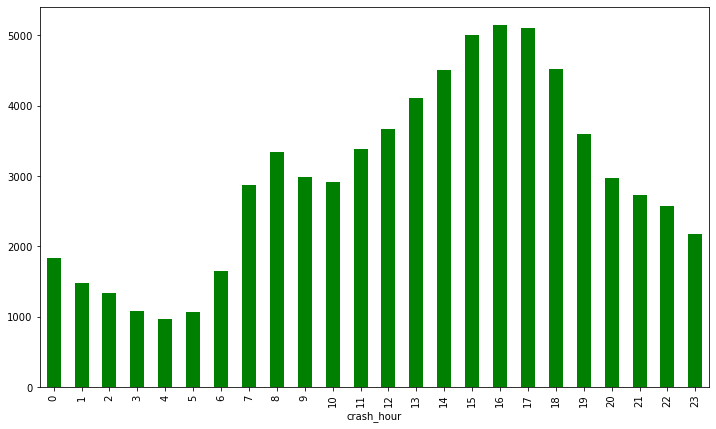

In [55]:
accidents_by_hour.plot(kind='bar', figsize=(12,7), color = 'green');

In [56]:
df_crashes['injuries_total'].value_counts()

0.0     469005
1.0      53666
2.0      11713
3.0       3567
4.0       1289
5.0        471
6.0        183
7.0         69
8.0         24
9.0         16
10.0         9
15.0         5
11.0         5
13.0         2
21.0         2
12.0         2
19.0         1
16.0         1
Name: injuries_total, dtype: int64

In [57]:
df_injuries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71025 entries, 7 to 1960812
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   crash_record_id          71025 non-null  object 
 1   crash_date_x             71025 non-null  object 
 2   latitude                 70624 non-null  float64
 3   longitude                70624 non-null  float64
 4   injury                   71025 non-null  int32  
 5   crash_month              71025 non-null  int64  
 6   fatality                 71025 non-null  int32  
 7   crash_hour               71025 non-null  int64  
 8   street_name              71025 non-null  object 
 9   damage                   71025 non-null  object 
 10  hit_and_run_i            15530 non-null  object 
 11  roadway_surface_cond     71025 non-null  object 
 12  road_defect              71025 non-null  object 
 13  weather_condition        71025 non-null  object 
 14  crash_day_of_week   

In [59]:
weekday_rush_hour_df = df_injuries[((df_injuries['crash_hour'] >= 7) & (df_injuries['crash_hour'] <= 9) | (df_injuries['crash_hour'] >= 15) & (df_injuries['crash_hour'] <= 19)) & ((df_injuries['crash_day_of_week'] >= 2) & (df_injuries['crash_day_of_week'] <= 6))]
weekday_rush_hour_df

,crash_record_id,crash_date_x,latitude,longitude,injury,crash_month,fatality,crash_hour,street_name,damage,hit_and_run_i,roadway_surface_cond,road_defect,weather_condition,crash_day_of_week,driver_action,exceed_speed_limit_i,prim_contributory_cause,rush_hour
7,ecf9e646f89a73ed3df0f373e4fbd18e91f5a595004019e9e70fc8ff56609eb5c5219e731aa6320a9df0a1522a8ddaec6a624ca4741831ac6a3fb4f9b9beffa8,02/03/2020 03:45:00 PM,41.997755,-87.694830,1,2,0,15,DEVON AVE,"OVER $1,500",NaN,DRY,NO DEFECTS,CLEAR,2,DISREGARDED CONTROL DEVICES,NaN,DISREGARDING TRAFFIC SIGNALS,1
64,ed571d6d3be6511047bea9305a81182fd7b99afbb0abc6a4d14f246f1de742dae65359e799ac82a3566d87bbc9cd657c33425dc757172032cdabb20bcb2bdebe,07/06/2020 03:57:00 PM,NaN,NaN,1,7,0,15,71ST ST,"OVER $1,500",NaN,DRY,UNKNOWN,CLEAR,2,DISREGARDED CONTROL DEVICES,NaN,DISREGARDING TRAFFIC SIGNALS,1
122,11f75e6c7483ab30f509ce337cf97dca293b9b9cea196fcd01bd13b3cc133954224f5d9c723451ac748a7c4fbdd347a5b4025b1f648c31e18b30e42e3d9f77f3,02/11/2020 07:30:00 AM,41.894822,-87.725919,1,2,0,7,PULASKI RD,$500 OR LESS,NaN,DRY,NO DEFECTS,CLEAR,3,NONE,NaN,NOT APPLICABLE,1
138,5d7f2a23b62b115dedc20e86b4310503da7d6a744aeae098770a1f7b145f2bb52f871f4d9a08c81d15c1b6aa83fc245b978b9c4e0ff4680d2ada586dc42842e6,02/05/2020 06:25:00 PM,41.883091,-87.636646,1,2,0,18,WACKER DR,$500 OR LESS,NaN,SNOW OR SLUSH,NO DEFECTS,SLEET/HAIL,4,UNKNOWN,NaN,UNABLE TO DETERMINE,1
182,cde2567ba445603c10c705b7bd3a2968aeaac23dd7d7fb89c0884a7428a49ea5e767ddae7db3dca923e91809c0d6c3af1b8e43b8646f52eeba3244cf58fbe593,02/11/2020 09:02:00 AM,41.903668,-87.653699,1,2,0,9,DIVISION ST,$500 OR LESS,NaN,DRY,NO DEFECTS,CLEAR,3,OTHER,NaN,"VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960477,cd13862641b9c19267c797907a00b49dd4b8903c1fd96ec72d9ddc59042a91e95ec6a666e2f102f773a3516696d83cb20b8d036362833959ac3becdc7b4ab7da,08/27/2021 07:24:00 PM,41.804037,-87.616157,1,8,0,19,50TH ST,$500 OR LESS,Y,DRY,NO DEFECTS,CLEAR,6,NONE,NaN,FAILING TO YIELD RIGHT-OF-WAY,1
1960527,38b7b71086e728f0166424c672077e4abe3527f68ecb5111817834bf0bf17a2152c67ef0f9c7592634fae144c77a32e6864d801bfb32d3a6938b3a07e099f27d,08/27/2021 07:22:00 PM,41.681405,-87.642175,1,8,0,19,HALSTED ST,"OVER $1,500",NaN,DRY,NO DEFECTS,CLEAR,6,UNKNOWN,NaN,FAILING TO YIELD RIGHT-OF-WAY,1
1960533,a50e5cdd70edb8b9faa65b1efcda9e77236ab755ddd69c5e9c8a31c1e23bc927faa2e6df0b336eb428b6ce36bf839699c3c7b45e9f89eb16c91d23f7e3ad328c,08/27/2021 06:00:00 PM,41.788207,-87.684026,1,8,0,18,WESTERN AVE,"OVER $1,500",NaN,DRY,NO DEFECTS,CLEAR,6,FOLLOWED TOO CLOSELY,NaN,FAILING TO REDUCE SPEED TO AVOID CRASH,1
1960752,734d77c5854d1c1b4e0bcebeb3990b7592de64aa748ef776e1bf5793299cb923eacfdb9882948e1a41ee41f60078f5243213c720ba103b806213c2b0406e2296,08/27/2021 06:00:00 PM,41.904066,-87.640191,1,8,0,18,CLYBOURN AVE,"$501 - $1,500",Y,DRY,NO DEFECTS,CLEAR,6,UNKNOWN,NaN,FAILING TO REDUCE SPEED TO AVOID CRASH,1


In [60]:
df_injuries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71025 entries, 7 to 1960812
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   crash_record_id          71025 non-null  object 
 1   crash_date_x             71025 non-null  object 
 2   latitude                 70624 non-null  float64
 3   longitude                70624 non-null  float64
 4   injury                   71025 non-null  int32  
 5   crash_month              71025 non-null  int64  
 6   fatality                 71025 non-null  int32  
 7   crash_hour               71025 non-null  int64  
 8   street_name              71025 non-null  object 
 9   damage                   71025 non-null  object 
 10  hit_and_run_i            15530 non-null  object 
 11  roadway_surface_cond     71025 non-null  object 
 12  road_defect              71025 non-null  object 
 13  weather_condition        71025 non-null  object 
 14  crash_day_of_week   

In [61]:
weekday_rush_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25565 entries, 7 to 1960812
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   crash_record_id          25565 non-null  object 
 1   crash_date_x             25565 non-null  object 
 2   latitude                 25448 non-null  float64
 3   longitude                25448 non-null  float64
 4   injury                   25565 non-null  int32  
 5   crash_month              25565 non-null  int64  
 6   fatality                 25565 non-null  int32  
 7   crash_hour               25565 non-null  int64  
 8   street_name              25565 non-null  object 
 9   damage                   25565 non-null  object 
 10  hit_and_run_i            4961 non-null   object 
 11  roadway_surface_cond     25565 non-null  object 
 12  road_defect              25565 non-null  object 
 13  weather_condition        25565 non-null  object 
 14  crash_day_of_week   

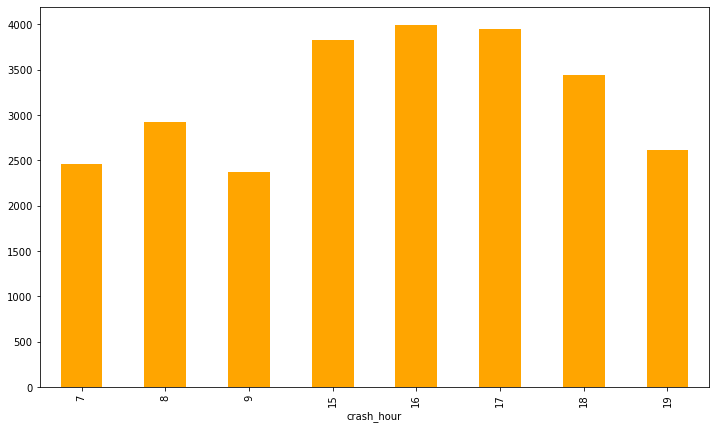

In [62]:
weekday_accidents_by_hour = weekday_rush_hour_df.groupby(weekday_rush_hour_df['crash_hour']).count()
weekday_accidents_by_hour = weekday_accidents_by_hour['crash_date_x']
weekday_accidents_by_hour.plot(kind='bar', figsize=(12,7), color = 'orange');